# Zomato Data Analysis Project

### step 1 - Importing the required libraries

In [16]:

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


### Creating the Data Frame 

In [17]:
dataframe = pd.read_csv('data.csv')
print(dataframe.head()) # lesss Fuuckinnn go data importedddd !!!

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## Q1  What type of Restaurants do the majority of customers order from?
#### Converting data type of 'rate' column to float




In [18]:
def handleRate(value):
     value = str(value).split('/')
     value = value[0]
     return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [19]:
# cleaning the data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Type of Restaurant

Text(0.5, 0, 'Type of Restaurant')

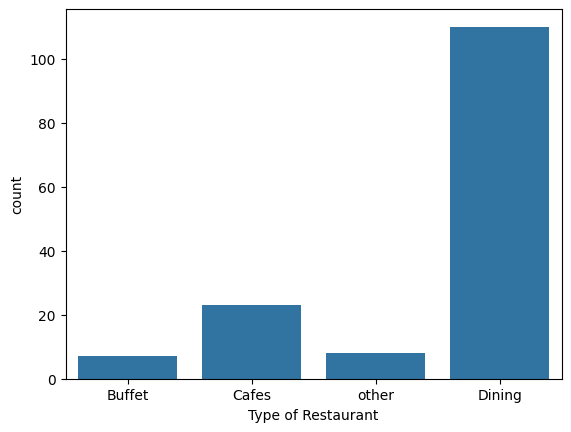

In [20]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Type of Restaurant')

### Conclusion -  majority of Restaurants falls in Dinning Category

# Q2 How Many votes has each type of restaurants received from customers ?

In [21]:
dataframe.head() #  two columns to be used for the line graph listed_in(type) and vote

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

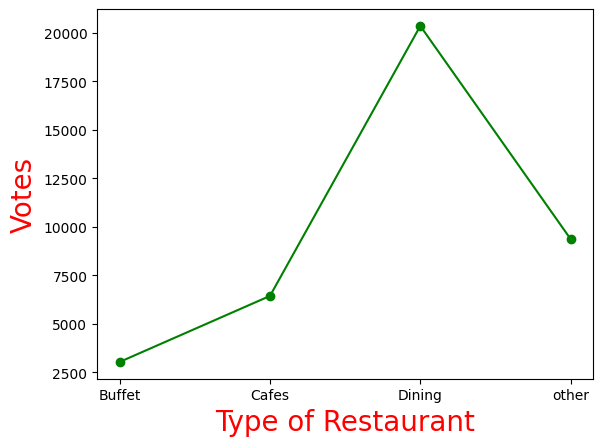

In [22]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = "green" , marker = 'o')
plt.xlabel('Type of Restaurant', c = "red" , size = 20)
plt.ylabel('Votes', c = "red" , size = 20)

#### conclusion - Dining Restaurants have Received Maximum votes 

# Q3 . What are the ratings that majority of restaurants have received ?

In [23]:
dataframe.head() # histogram on rate

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


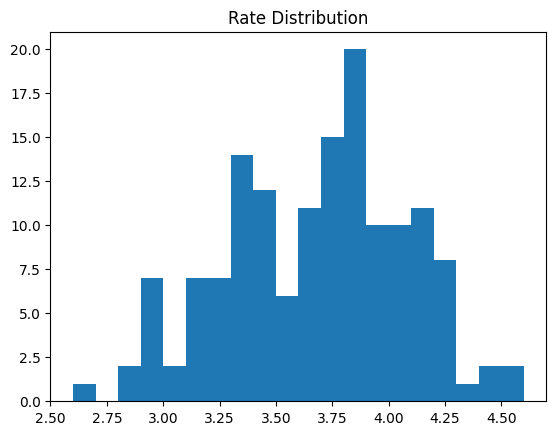

In [25]:
plt.hist(dataframe['rate'], bins = 20)
plt.title('Rate Distribution')
plt.show()

### conclusion - The Majority restaurant receives rating from 3.75 to 3.85

# Q4. Zomato has Observed that Most Couples order most of their food online, what is their average spending on Each other

In [26]:
dataframe.head() 

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

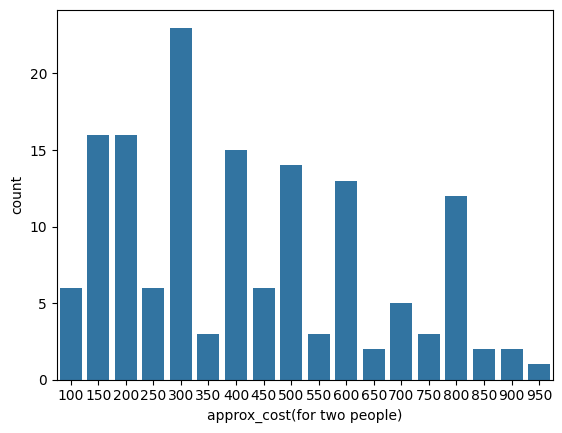

In [27]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x = couple_data)

### conclusion - Majority of Couples prefer restaurants with an approximate cost of 300 rupees

# Which mode (online or offline) has Received the maximum Rating ?

In [28]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

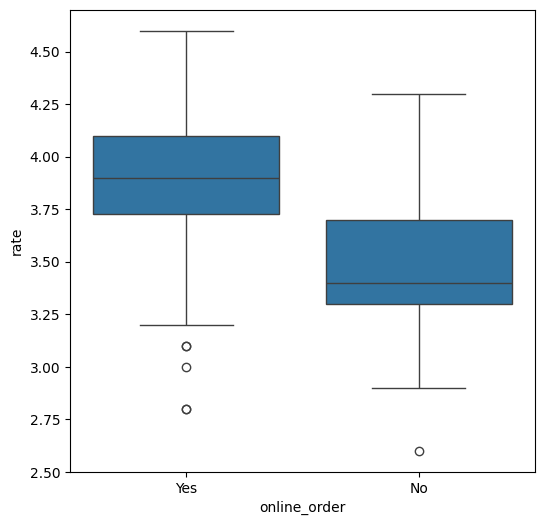

In [29]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)


### Online Orders has Received most rating than Lower rating

# Q6 Which type of Restaurants has received more offline orders ,so that zomato can provide customers with some good offer

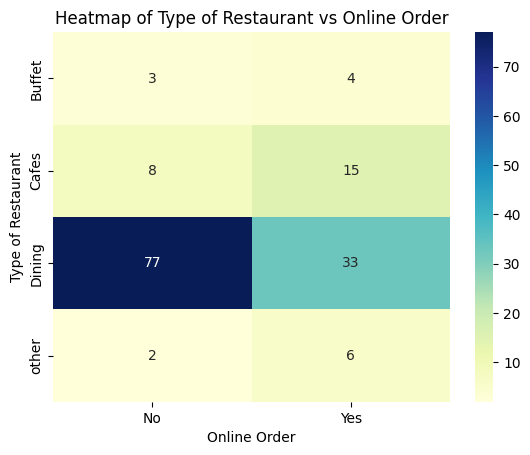

In [30]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)', columns='online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, fmt = 'd', cmap='YlGnBu')
plt.title('Heatmap of Type of Restaurant vs Online Order')
plt.xlabel('Online Order')
plt.ylabel('Type of Restaurant')
plt.show()

### conclusion - Dinning restaurnts primarily accept offline orders 